# Day 7

## Part 1

Network analysis using Python [NetworkX](https://networkx.org) library.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def getGraphNX(lines):
    G = nx.DiGraph() # Directed graphs, i.e. graphs with directed edges.
    for l in lines:
        G.add_edge(l.split(" ")[1],l.split(" ")[7])
    return G

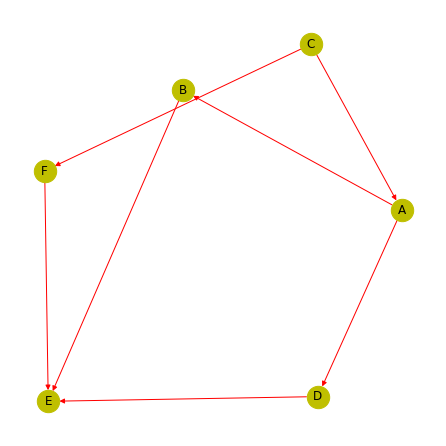

In [3]:
lines_test = [
"Step C must be finished before step A can begin.",
"Step C must be finished before step F can begin.",
"Step A must be finished before step B can begin.",
"Step A must be finished before step D can begin.",
"Step B must be finished before step E can begin.",
"Step D must be finished before step E can begin.",
"Step F must be finished before step E can begin."
]

Gx_test = getGraphNX(lines_test)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(Gx_test)
nx.draw(Gx_test,pos,cmap=plt.get_cmap('jet'),node_size = 500,edge_color='r',node_color="y")
lab = nx.draw_networkx_labels(Gx_test, pos)

NetworkX has severa network handy sorting algorithms implemented, among which [lexicographical topological sort](https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.algorithms.dag.lexicographical_topological_sort.html), that return a `lexicographically_topologically_sorted_nodes` object, an iterable of node names in lexicographical topological sort order.

See also: https://en.wikipedia.org/wiki/Topological_sorting

In [4]:
print("Test 1:","".join(nx.lexicographical_topological_sort(Gx_test)))

Test 1: CABDFE


Part 1: MNQKRSFWGXPZJCOTVYEBLAHIUD


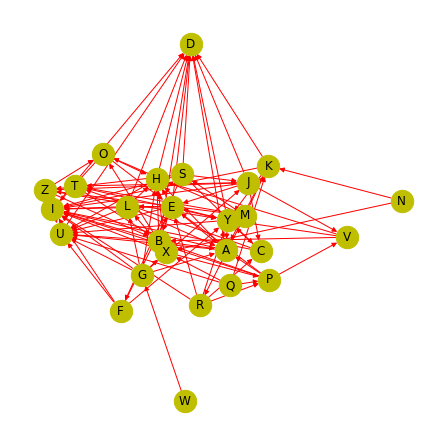

In [5]:
with open('data/input07.txt') as f:
    lines = [l.strip("\n") for l in f.readlines()]

Gx = getGraphNX(lines)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(Gx)
nx.draw(Gx,pos,node_size = 500,edge_color='r',node_color="y")
lab = nx.draw_networkx_labels(Gx,pos)
    
print("Part 1:","".join(nx.lexicographical_topological_sort(Gx)))

## Part 1

`NetworkX` is powerful and I'm glad I learned about its existence, but I also wanted to implement my own topological sort to understand how it work. Here it is:

In [31]:
from collections import defaultdict 
  
class Graph: 
    def __init__(self): 
        self.graph = defaultdict(list)
        self.V = []
  
    def addEdge(self,u,v): 
        self.graph[u].append(v)
        if u not in self.V:
            self.V.append(u)
        if v not in self.V:
            self.V.append(v)

    def topologicalSortVertex(self,v,visited,stack): 
        # mark the current node as visited
        visited[self.V.index(v)] = True
        # Recur for all the vertices adjacent to current vertex 
        av = self.graph[v]
        # sort recurred vertices in *reverse* order
        av.sort(reverse=True) 
        for u in av:
            if visited[self.V.index(u)] == False: 
                self.topologicalSortVertex(u,visited,stack) 
        # Push current vertex to beginning of stack
        stack.insert(0,v) 
            
    def topologicalSort(self):
        # sort vertices in *reverse* order
        self.V.sort(reverse=True) 
        # mark all vertices as not visited
        visited = [False]*len(self.V)
        # Initialize stack
        stack = [] 
        # Call recursive helper function to compute topological sort and
        # store result in stack, starting from *last* vertex accoding to sorting
        for v in self.V: 
            if visited[self.V.index(v)] == False: 
                self.topologicalSortVertex(v,visited,stack) 
        return stack 

In [32]:
G_test = Graph()
for l in lines_test:
    G_test.addEdge(l.split(" ")[1],l.split(" ")[7])
print("".join(G_test.topologicalSort()))

CABDFE


In [33]:
G = Graph()
for l in lines:
    G.addEdge(l.split(" ")[1],l.split(" ")[7])
print("".join(G.topologicalSort()))

MNQKRSFWGXPZJCTVOYEBLAHIUD


## Part 2

In [94]:
def timeNeeded(a,deltat=60):
    alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    return deltat+alpha.index(a)+1

def teamWork(Gx,nworkers=5,deltat=60,verbose=True):
    
    work = [] # ongoing work queue
    work_times = [] # time of ongoing work
    time = 0
    
    # After being completed I'll remove a given node from the graph. Loop completion condition is either 
    # an empty graph (since I'm removing completed nodes) or an empty work queue
    while len(work) or len(Gx): 

        # add wotk todo to queue from graph using in_degree() method
        # https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.DiGraph.in_degree.html
        # in_degree() returns the in-degree of a node or nodes.
        # I assign to workers those nodes with no incoming edges
        # Since I remove completed nodes from graph, these nodes will increase as soon as parents are completed and removed
        work_todo = [t for t in Gx if t not in work and Gx.in_degree(t) == 0]
        
        if verbose:
            print(time,work_todo)

        if work_todo and len(work_times) < nworkers: # still work todo, and idle workers available

            w = sorted(work_todo)[0]
            work.append(w)
            work_times.append( timeNeeded(w,deltat) )

        else: # let the workers work...

            # min_time = time needed to complete shortest-lasting item
            min_time = min(work_times) 
            # declare item(s) lasted min_time as completed
            completed = [ work[i] for i, t in enumerate(work_times) if t == min_time ]
            # decrease times for all other items by min_time
            work_times = [ t-min_time for t in work_times if t > min_time ]
            # update item collections
            work = [ w for w in work if w not in completed ]
            # increment time
            time += min_time
            # remove completed nodes from graph. I'm basically using the graph as queue (somewhat destructive!)
            Gx.remove_nodes_from(completed)

    return(time)

In [95]:
Gx_test = getGraphNX(lines_test)

t_test = teamWork(Gx_test,nworkers=2,deltat=0)
print("Time (test) =", t_test)

0 ['C']
0 []
3 ['A', 'F']
3 ['F']
3 []
4 ['B', 'D']
4 ['D']
6 ['D']
6 []
9 []
10 ['E']
10 []
Time (test) = 15


In [96]:
with open('data/input07.txt') as f:
    lines = [l.strip("\n") for l in f.readlines()]

Gx = getGraphNX(lines)
t = teamWork(Gx,nworkers=5,deltat=60)
print("Time (Part 2) =", t)

0 ['W', 'N', 'M', 'Q']
0 ['W', 'N', 'Q']
0 ['W', 'Q']
0 ['W']
0 []
73 ['S', 'R']
73 ['S']
73 []
74 []
77 ['K']
77 []
83 ['G']
83 []
148 []
150 ['X']
150 []
151 []
152 ['F', 'Z']
152 ['Z']
152 []
218 []
234 ['P']
234 []
238 ['O', 'J']
238 ['O']
238 []
308 ['C']
308 []
310 ['V']
310 []
313 []
371 ['T']
371 []
392 []
451 ['Y']
451 []
536 ['E']
536 []
601 ['L', 'B']
601 ['L']
601 []
663 []
673 ['A']
673 []
734 ['I', 'H']
734 ['I']
734 []
802 []
803 ['U']
803 []
884 ['D']
884 []
Time (Part 2) = 948
